In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_mldata
%matplotlib inline
from sklearn.utils import shuffle
from tga import TGA
from sklearn.model_selection import train_test_split


# #use all digits

SPLIT = 16000
END = 24000

mnist = fetch_mldata("MNIST original")
x_dat, y_dat = mnist.data[:] / 255., mnist.target[:]
x_dat, y_dat = shuffle(x_dat, y_dat)


In [2]:
def showDigitImage(array):
    t = (array).reshape(28,28)
    plt.imshow(t)
    plt.show()
    
def filt_num(xs,ys,ns):
    xs = xs.copy()
    ys = ys.copy()
    all_truth = [False]*len(ys)
    for i in ns:
        cur_truth = ys==i
        all_truth = [a or b for a,b in zip(all_truth,cur_truth)]
    return xs[all_truth],ys[all_truth]

new_xs,new_ys = filt_num(x_dat,y_dat,[6,9])
new_xs[0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [3]:
from sklearn.preprocessing import StandardScaler
std_xs = StandardScaler().fit_transform(new_xs)
std_xs[0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.00850241, -0.00850241,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.00850241, -0.00980867, -0.01832771,
       -0.02388647, -0.02975623, -0.03988411, -0.05254842, -0.06569007,
       -0.07038838, -0.06996739, -0.0701089 , -0.06373624, -0.06119965,
       -0.0582227 , -0.05116652, -0.04171976, -0.03626714, -0.02290542,
       -0.0173392 , -0.00912344,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.00850241, -0.00850241,
       -0.01734671, -0.02435313, -0.03360082, -0.05396514, -0.07406706,
       -0.10568093, -0.13866419, -0.17642608, -0.21246221, -0.24

In [4]:

len(std_xs)


13834

In [5]:
X_train, X_test, y_train, y_test = train_test_split(std_xs,new_ys, test_size=0.3)

X_train.shape,X_test.shape

((9683, 784), (4151, 784))

# PCA: 5 components

In [6]:

pca5 = PCA(n_components=5)
pca5.fit(X_train)
pca_dat = pca5.transform(std_xs)

tga5 = TGA(n_components=5)
tga5.fit(X_train)
tga_dat = tga5.transform(std_xs)

0,1,2,3,4,

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics, cross_validation, svm
from sklearn import datasets
def get_score(f,xs,ys,cv_no):
    scores = cross_validation.cross_val_score(f,xs, ys, cv=cv_no)
    print("Score = ",scores.mean())
    return scores


/usr/local/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
ori_rs_lr = []
ori_rs_svm = []
pca_5_rs_lr = []
pca_5_rs_svm = []
tga_5_rs_lr = []
tga_5_rs_svm = []

# Original feature
ori_rs_lr.append(get_score(LogisticRegression(),std_xs,new_ys,2))
ori_rs_svm.append(get_score(svm.SVC(kernel='linear',C=1),std_xs,new_ys,2))

# PCA
pca_5_rs_lr.append(get_score(LogisticRegression(),pca_dat,new_ys,2))
pca_5_rs_svm.append(get_score(svm.SVC(kernel='linear',C=1),pca_dat,new_ys,2))

# TGA
tga_5_rs_lr.append(get_score(LogisticRegression(),tga_dat,new_ys,2))
tga_5_rs_svm.append(get_score(svm.SVC(kernel='linear',C=1),tga_dat,new_ys,2))


Score =  0.998409715194
Score =  0.99804828683
Score =  0.996168859332
Score =  0.996313430678
Score =  0.994217146162
Score =  0.993855717797


In [9]:
# Original feature
ori_rs_lr.append(get_score(LogisticRegression(),std_xs,new_ys,4))
ori_rs_svm.append(get_score(svm.SVC(kernel='linear',C=1),std_xs,new_ys,4))

# PCA
pca_5_rs_lr.append(get_score(LogisticRegression(),pca_dat,new_ys,4))
pca_5_rs_svm.append(get_score(svm.SVC(kernel='linear',C=1),pca_dat,new_ys,4))

# TGA
tga_5_rs_lr.append(get_score(LogisticRegression(),tga_dat,new_ys,4))
tga_5_rs_svm.append(get_score(svm.SVC(kernel='linear',C=1),tga_dat,new_ys,4))



Score =  0.998771133083
Score =  0.99812048886
Score =  0.996313420151
Score =  0.996385716275
Score =  0.994144870817
Score =  0.994144891718


In [10]:
# Original feature
ori_rs_lr.append(get_score(LogisticRegression(),std_xs,new_ys,10))
ori_rs_svm.append(get_score(svm.SVC(kernel='linear',C=1),std_xs,new_ys,10))

# PCA
pca_5_rs_lr.append(get_score(LogisticRegression(),pca_dat,new_ys,10))
pca_5_rs_svm.append(get_score(svm.SVC(kernel='linear',C=1),pca_dat,new_ys,10))

# TGA
tga_5_rs_lr.append(get_score(LogisticRegression(),tga_dat,new_ys,10))
tga_5_rs_svm.append(get_score(svm.SVC(kernel='linear',C=1),tga_dat,new_ys,10))


Score =  0.998770892253
Score =  0.998192491632
Score =  0.996313199432
Score =  0.996240945097
Score =  0.994072687877
Score =  0.994072583312


In [11]:

pca10 = PCA(n_components=10)
pca10.fit(X_train)
pca_dat = pca10.transform(std_xs)

tga10 = TGA(n_components=10)
tga10.fit(X_train)
tga_dat = tga10.transform(std_xs)

0,1,2,3,4,5,6,7,8,9,

In [12]:

pca_10_rs_lr = []
pca_10_rs_svm = []
tga_10_rs_lr = []
tga_10_rs_svm = []

# PCA
pca_10_rs_lr.append(get_score(LogisticRegression(),pca_dat,new_ys,2))
pca_10_rs_svm.append(get_score(svm.SVC(kernel='linear',C=1),pca_dat,new_ys,2))

# TGA
tga_10_rs_lr.append(get_score(LogisticRegression(),tga_dat,new_ys,2))
tga_10_rs_svm.append(get_score(svm.SVC(kernel='linear',C=1),tga_dat,new_ys,2))


Score =  0.995952002313
Score =  0.99587971664
Score =  0.9946508602
Score =  0.99515685991


In [13]:
# PCA
pca_10_rs_lr.append(get_score(LogisticRegression(),pca_dat,new_ys,4))
pca_10_rs_svm.append(get_score(svm.SVC(kernel='linear',C=1),pca_dat,new_ys,4))

# TGA
tga_10_rs_lr.append(get_score(LogisticRegression(),tga_dat,new_ys,4))
tga_10_rs_svm.append(get_score(svm.SVC(kernel='linear',C=1),tga_dat,new_ys,4))


Score =  0.995807472681
Score =  0.99580743088
Score =  0.994867790264
Score =  0.994940065488


In [14]:
# PCA
pca_10_rs_lr.append(get_score(LogisticRegression(),pca_dat,new_ys,10))
pca_10_rs_svm.append(get_score(svm.SVC(kernel='linear',C=1),pca_dat,new_ys,10))

# TGA
tga_10_rs_lr.append(get_score(LogisticRegression(),tga_dat,new_ys,10))
tga_10_rs_svm.append(get_score(svm.SVC(kernel='linear',C=1),tga_dat,new_ys,10))


Score =  0.995879621176
Score =  0.995662596796
Score =  0.994723238193
Score =  0.995084614434


In [15]:

pca20 = PCA(n_components=20)
pca20.fit(X_train)
pca_dat = pca20.transform(std_xs)

tga20 = TGA(n_components=20)
tga20.fit(X_train)
tga_dat = tga20.transform(std_xs)

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,

In [16]:

pca_20_rs_lr = []
pca_20_rs_svm = []
tga_20_rs_lr = []
tga_20_rs_svm = []

# PCA
pca_20_rs_lr.append(get_score(LogisticRegression(),pca_dat,new_ys,2))
pca_20_rs_svm.append(get_score(svm.SVC(kernel='linear',C=1),pca_dat,new_ys,2))

# TGA
tga_20_rs_lr.append(get_score(LogisticRegression(),tga_dat,new_ys,2))
tga_20_rs_svm.append(get_score(svm.SVC(kernel='linear',C=1),tga_dat,new_ys,2))


Score =  0.996458002024
Score =  0.99660257337
Score =  0.995446002602
Score =  0.995373716929


In [17]:
# PCA
pca_20_rs_lr.append(get_score(LogisticRegression(),pca_dat,new_ys,4))
pca_20_rs_svm.append(get_score(svm.SVC(kernel='linear',C=1),pca_dat,new_ys,4))

# TGA
tga_20_rs_lr.append(get_score(LogisticRegression(),tga_dat,new_ys,4))
tga_20_rs_svm.append(get_score(svm.SVC(kernel='linear',C=1),tga_dat,new_ys,4))


Score =  0.996747113297
Score =  0.996602583749
Score =  0.99530148341
Score =  0.995012382514


In [18]:
# PCA
pca_20_rs_lr.append(get_score(LogisticRegression(),pca_dat,new_ys,10))
pca_20_rs_svm.append(get_score(svm.SVC(kernel='linear',C=1),pca_dat,new_ys,10))

# TGA
tga_20_rs_lr.append(get_score(LogisticRegression(),tga_dat,new_ys,10))
tga_20_rs_svm.append(get_score(svm.SVC(kernel='linear',C=1),tga_dat,new_ys,10))


Score =  0.997036265609
Score =  0.996602635108
Score =  0.99559060391
Score =  0.995084666754


# 30 features

In [50]:

pca30 = PCA(n_components=30)
pca30.fit(X_train)
pca_dat = pca30.transform(std_xs)

tga30 = TGA(n_components=30)
tga30.fit(X_train)
tga_dat = tga30.transform(std_xs)

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,

In [51]:

pca_30_rs_lr = []
pca_30_rs_svm = []
tga_30_rs_lr = []
tga_30_rs_svm = []

# PCA
pca_30_rs_lr.append(get_score(LogisticRegression(),pca_dat,new_ys,2))
pca_30_rs_svm.append(get_score(svm.SVC(kernel='linear',C=1),pca_dat,new_ys,2))

# TGA
tga_30_rs_lr.append(get_score(LogisticRegression(),tga_dat,new_ys,2))
tga_30_rs_svm.append(get_score(svm.SVC(kernel='linear',C=1),tga_dat,new_ys,2))

# PCA
pca_30_rs_lr.append(get_score(LogisticRegression(),pca_dat,new_ys,4))
pca_30_rs_svm.append(get_score(svm.SVC(kernel='linear',C=1),pca_dat,new_ys,4))

# TGA
tga_30_rs_lr.append(get_score(LogisticRegression(),tga_dat,new_ys,4))
tga_30_rs_svm.append(get_score(svm.SVC(kernel='linear',C=1),tga_dat,new_ys,4))

# PCA
pca_30_rs_lr.append(get_score(LogisticRegression(),pca_dat,new_ys,10))
pca_30_rs_svm.append(get_score(svm.SVC(kernel='linear',C=1),pca_dat,new_ys,10))

# TGA
tga_30_rs_lr.append(get_score(LogisticRegression(),tga_dat,new_ys,10))
tga_30_rs_svm.append(get_score(svm.SVC(kernel='linear',C=1),tga_dat,new_ys,10))



Score =  0.99660257337
Score =  0.996964001735
Score =  0.996530287697
Score =  0.996458002024
Score =  0.997036235094
Score =  0.99732533599
Score =  0.997036235094
Score =  0.996674817172
Score =  0.996963645259
Score =  0.996819084344
Score =  0.996891390848
Score =  0.997180774128


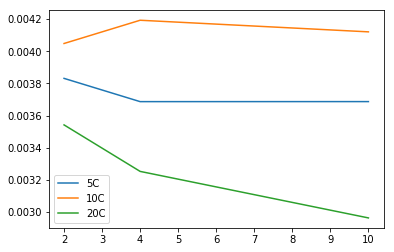

In [20]:
mean_scores_lr = []
mean_scores_lr.append([1-i.mean() for i in pca_5_rs_lr])
mean_scores_lr.append([1-i.mean() for i in pca_10_rs_lr])
mean_scores_lr.append([1-i.mean() for i in pca_20_rs_lr])
labels = ["5C","10C","20C"]

mean_scores_lr
for i in range(len(mean_scores_lr)):
    plt.plot([2,4,10],mean_scores_lr[i],label=labels[i])
plt.legend()

In [21]:
def rotate180(features):
    return features.copy()[::-1]
  
def vertical_flip(features):
    return np.flip(features.copy().reshape(28,28),1).ravel()
        
def add_true_noise_to_train_set(x_train,p):
    rs = []
    thresholds = np.random.rand(len(x_train)) < p
    for i in range(len(x_train)):
        if(thresholds[i]):
#             print(i)
            if(np.random.rand()<0.5):
                
                rs += [vertical_flip(x_train[i].copy())]
            else:
                rs += [rotate180(x_train[i].copy())]
        else:
            rs += [x_train[i].copy()]
    return rs


In [42]:
true_noise_xs = add_true_noise_to_train_set(std_xs,0.2)
X_train, X_test, y_train, y_test = train_test_split(true_noise_xs,new_ys, test_size=0.3)


noisy_pca5 = PCA(n_components=5)
noisy_pca5.fit(X_train)
pca_dat = noisy_pca5.transform(true_noise_xs)

noisy_tga5 = TGA(n_components=5)
noisy_tga5.fit(X_train)
tga_dat = noisy_tga5.transform(true_noise_xs)

0,1,2,3,4,

In [43]:
noisy_ori_rs_lr = []
noisy_ori_rs_svm = []
noisy_pca_5_rs_lr = []
noisy_pca_5_rs_svm = []
noisy_tga_5_rs_lr = []
noisy_tga_5_rs_svm = []

# Original feature
noisy_ori_rs_lr.append(get_score(LogisticRegression(),true_noise_xs,new_ys,2))
noisy_ori_rs_svm.append(get_score(svm.SVC(kernel='linear',C=1),true_noise_xs,new_ys,2))

# PCA
noisy_pca_5_rs_lr.append(get_score(LogisticRegression(),pca_dat,new_ys,2))
noisy_pca_5_rs_svm.append(get_score(svm.SVC(kernel='linear',C=1),pca_dat,new_ys,2))

# TGA
noisy_tga_5_rs_lr.append(get_score(LogisticRegression(),tga_dat,new_ys,2))
noisy_tga_5_rs_svm.append(get_score(svm.SVC(kernel='linear',C=1),tga_dat,new_ys,2))


# Original feature
noisy_ori_rs_lr.append(get_score(LogisticRegression(),true_noise_xs,new_ys,4))
noisy_ori_rs_svm.append(get_score(svm.SVC(kernel='linear',C=1),true_noise_xs,new_ys,4))

# PCA
noisy_pca_5_rs_lr.append(get_score(LogisticRegression(),pca_dat,new_ys,4))
noisy_pca_5_rs_svm.append(get_score(svm.SVC(kernel='linear',C=1),pca_dat,new_ys,4))

# TGA
noisy_tga_5_rs_lr.append(get_score(LogisticRegression(),tga_dat,new_ys,4))
noisy_tga_5_rs_svm.append(get_score(svm.SVC(kernel='linear',C=1),tga_dat,new_ys,4))

# Original feature
noisy_ori_rs_lr.append(get_score(LogisticRegression(),true_noise_xs,new_ys,10))
noisy_ori_rs_svm.append(get_score(svm.SVC(kernel='linear',C=1),true_noise_xs,new_ys,10))

# PCA
noisy_pca_5_rs_lr.append(get_score(LogisticRegression(),pca_dat,new_ys,10))
noisy_pca_5_rs_svm.append(get_score(svm.SVC(kernel='linear',C=1),pca_dat,new_ys,10))

# TGA
noisy_tga_5_rs_lr.append(get_score(LogisticRegression(),tga_dat,new_ys,10))
noisy_tga_5_rs_svm.append(get_score(svm.SVC(kernel='linear',C=1),tga_dat,new_ys,10))



Score =  0.927063755964
Score =  0.926557756253
Score =  0.893523203701
Score =  0.894968917161
Score =  0.89178834755
Score =  0.893306346682
Score =  0.931906915531
Score =  0.934653562153
Score =  0.893595528952
Score =  0.895258089015
Score =  0.891427230428
Score =  0.893306448956
Score =  0.934291955994
Score =  0.936894366313
Score =  0.893811390815
Score =  0.895184484559
Score =  0.891643551703
Score =  0.893305715109


In [44]:

noisy_pca10 = PCA(n_components=10)
noisy_pca10.fit(X_train)
pca_dat = noisy_pca10.transform(true_noise_xs)

noisy_tga10 = TGA(n_components=10)
noisy_tga10.fit(X_train)
tga_dat = noisy_tga10.transform(true_noise_xs)

0,1,2,3,4,5,6,7,8,9,

In [45]:

noisy_pca_10_rs_lr = []
noisy_pca_10_rs_svm = []
noisy_tga_10_rs_lr = []
noisy_tga_10_rs_svm = []

# PCA
noisy_pca_10_rs_lr.append(get_score(LogisticRegression(),pca_dat,new_ys,2))
noisy_pca_10_rs_svm.append(get_score(svm.SVC(kernel='linear',C=1),pca_dat,new_ys,2))

# TGA
noisy_tga_10_rs_lr.append(get_score(LogisticRegression(),tga_dat,new_ys,2))
noisy_tga_10_rs_svm.append(get_score(svm.SVC(kernel='linear',C=1),tga_dat,new_ys,2))

# PCA
noisy_pca_10_rs_lr.append(get_score(LogisticRegression(),pca_dat,new_ys,4))
noisy_pca_10_rs_svm.append(get_score(svm.SVC(kernel='linear',C=1),pca_dat,new_ys,4))

# TGA
noisy_tga_10_rs_lr.append(get_score(LogisticRegression(),tga_dat,new_ys,4))
noisy_tga_10_rs_svm.append(get_score(svm.SVC(kernel='linear',C=1),tga_dat,new_ys,4))

# PCA
noisy_pca_10_rs_lr.append(get_score(LogisticRegression(),pca_dat,new_ys,10))
noisy_pca_10_rs_svm.append(get_score(svm.SVC(kernel='linear',C=1),pca_dat,new_ys,10))

# TGA
noisy_tga_10_rs_lr.append(get_score(LogisticRegression(),tga_dat,new_ys,10))
noisy_tga_10_rs_svm.append(get_score(svm.SVC(kernel='linear',C=1),tga_dat,new_ys,10))



Score =  0.89301720399
Score =  0.894752060142
Score =  0.889981205725
Score =  0.893956917739
Score =  0.892438832755
Score =  0.894607465692
Score =  0.890125879279
Score =  0.893957030477
Score =  0.892653648564
Score =  0.894533620397
Score =  0.890413763944
Score =  0.89381170451


In [46]:

pca20 = PCA(n_components=20)
pca20.fit(X_train)
pca_dat = pca20.transform(true_noise_xs)

tga20 = TGA(n_components=20)
tga20.fit(X_train)
tga_dat = tga20.transform(true_noise_xs)

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,

In [47]:

noisy_pca_20_rs_lr = []
noisy_pca_20_rs_svm = []
noisy_tga_20_rs_lr = []
noisy_tga_20_rs_svm = []

# PCA
noisy_pca_20_rs_lr.append(get_score(LogisticRegression(),pca_dat,new_ys,2))
noisy_pca_20_rs_svm.append(get_score(svm.SVC(kernel='linear',C=1),pca_dat,new_ys,2))

# TGA
noisy_tga_20_rs_lr.append(get_score(LogisticRegression(),tga_dat,new_ys,2))
noisy_tga_20_rs_svm.append(get_score(svm.SVC(kernel='linear',C=1),tga_dat,new_ys,2))

# PCA
noisy_pca_20_rs_lr.append(get_score(LogisticRegression(),pca_dat,new_ys,4))
noisy_pca_20_rs_svm.append(get_score(svm.SVC(kernel='linear',C=1),pca_dat,new_ys,4))

# TGA
noisy_tga_20_rs_lr.append(get_score(LogisticRegression(),tga_dat,new_ys,4))
noisy_tga_20_rs_svm.append(get_score(svm.SVC(kernel='linear',C=1),tga_dat,new_ys,4))

# PCA
noisy_pca_20_rs_lr.append(get_score(LogisticRegression(),pca_dat,new_ys,10))
noisy_pca_20_rs_svm.append(get_score(svm.SVC(kernel='linear',C=1),pca_dat,new_ys,10))

# TGA
noisy_tga_20_rs_lr.append(get_score(LogisticRegression(),tga_dat,new_ys,10))
noisy_tga_20_rs_svm.append(get_score(svm.SVC(kernel='linear',C=1),tga_dat,new_ys,10))



Score =  0.897571201388
Score =  0.896270059274
Score =  0.904004626283
Score =  0.90465519734
Score =  0.89851126833
Score =  0.895764266394
Score =  0.90436631391
Score =  0.904944871017
Score =  0.898005644239
Score =  0.896413801058
Score =  0.90414966667
Score =  0.90487262813


In [53]:

pca30 = PCA(n_components=30)
pca30.fit(X_train)
pca_dat = pca30.transform(true_noise_xs)

tga30 = TGA(n_components=30)
tga30.fit(X_train)
tga_dat = tga30.transform(true_noise_xs)

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,

In [54]:

noisy_pca_30_rs_lr = []
noisy_pca_30_rs_svm = []
noisy_tga_30_rs_lr = []
noisy_tga_30_rs_svm = []

# PCA
noisy_pca_30_rs_lr.append(get_score(LogisticRegression(),pca_dat,new_ys,2))
noisy_pca_30_rs_svm.append(get_score(svm.SVC(kernel='linear',C=1),pca_dat,new_ys,2))

# TGA
noisy_tga_30_rs_lr.append(get_score(LogisticRegression(),tga_dat,new_ys,2))
noisy_tga_30_rs_svm.append(get_score(svm.SVC(kernel='linear',C=1),tga_dat,new_ys,2))

# PCA
noisy_pca_30_rs_lr.append(get_score(LogisticRegression(),pca_dat,new_ys,4))
noisy_pca_30_rs_svm.append(get_score(svm.SVC(kernel='linear',C=1),pca_dat,new_ys,4))

# TGA
noisy_tga_30_rs_lr.append(get_score(LogisticRegression(),tga_dat,new_ys,4))
noisy_tga_30_rs_svm.append(get_score(svm.SVC(kernel='linear',C=1),tga_dat,new_ys,4))

# PCA
noisy_pca_30_rs_lr.append(get_score(LogisticRegression(),pca_dat,new_ys,10))
noisy_pca_30_rs_svm.append(get_score(svm.SVC(kernel='linear',C=1),pca_dat,new_ys,10))

# TGA
noisy_tga_30_rs_lr.append(get_score(LogisticRegression(),tga_dat,new_ys,10))
noisy_tga_30_rs_svm.append(get_score(svm.SVC(kernel='linear',C=1),tga_dat,new_ys,10))



Score =  0.909353766084
Score =  0.907257481567
Score =  0.913690906462
Score =  0.916004047998
Score =  0.909281697974
Score =  0.907474608364
Score =  0.913618817542
Score =  0.915353631928
Score =  0.909860216468
Score =  0.906823757162
Score =  0.914052274104
Score =  0.91549715168


# -------------------------------------------

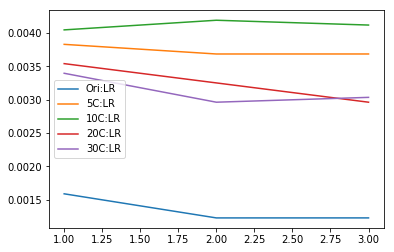

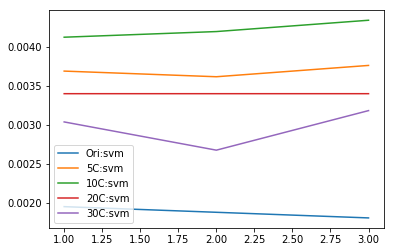

In [56]:
mean_scores_lr = []

mean_scores_lr.append([1-i.mean() for i in ori_rs_lr])
mean_scores_lr.append([1-i.mean() for i in pca_5_rs_lr])
mean_scores_lr.append([1-i.mean() for i in pca_10_rs_lr])
mean_scores_lr.append([1-i.mean() for i in pca_20_rs_lr])
mean_scores_lr.append([1-i.mean() for i in pca_30_rs_lr])
labels = ["Ori","5C","10C","20C","30C"]
for i in range(len(mean_scores_lr)):
    plt.plot([1,2,3],mean_scores_lr[i],label=labels[i]+":LR")
    
plt.legend()
plt.figure()
# print(pca_5_rs_svm)

mean_scores_lr = []
mean_scores_lr.append([1-i.mean() for i in ori_rs_svm])
mean_scores_lr.append([1-i.mean() for i in pca_5_rs_svm])
mean_scores_lr.append([1-i.mean() for i in pca_10_rs_svm])
mean_scores_lr.append([1-i.mean() for i in pca_20_rs_svm])
mean_scores_lr.append([1-i.mean() for i in pca_30_rs_svm])
labels = ["Ori","5C","10C","20C","30C"]
for i in range(len(mean_scores_lr)):
    plt.plot([1,2,3],mean_scores_lr[i],label=labels[i]+":svm")
plt.legend()


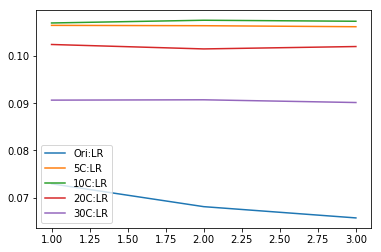

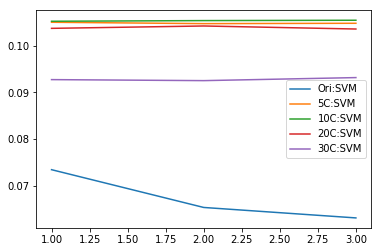

In [57]:
mean_scores_lr = []

mean_scores_lr.append([1-i.mean() for i in noisy_ori_rs_lr])
mean_scores_lr.append([1-i.mean() for i in noisy_pca_5_rs_lr])
mean_scores_lr.append([1-i.mean() for i in noisy_pca_10_rs_lr])
mean_scores_lr.append([1-i.mean() for i in noisy_pca_20_rs_lr])
mean_scores_lr.append([1-i.mean() for i in noisy_pca_30_rs_lr])
labels = ["Ori","5C","10C","20C","30C"]
for i in range(len(mean_scores_lr)):
    plt.plot([1,2,3],mean_scores_lr[i],label=labels[i]+":LR")
    
plt.legend()
plt.figure()

mean_scores_lr = []
mean_scores_lr.append([1-i.mean() for i in noisy_ori_rs_svm])
mean_scores_lr.append([1-i.mean() for i in noisy_pca_5_rs_svm])
mean_scores_lr.append([1-i.mean() for i in noisy_pca_10_rs_svm])
mean_scores_lr.append([1-i.mean() for i in noisy_pca_20_rs_svm])
mean_scores_lr.append([1-i.mean() for i in noisy_pca_30_rs_svm])
labels = ["Ori","5C","10C","20C","30C"]
for i in range(len(mean_scores_lr)):
    plt.plot([1,2,3],mean_scores_lr[i],label=labels[i]+":SVM")
        
plt.legend()
plt.figure()

In [69]:
def sp_noise(image,prob=0.2):

    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(len(image)):
        rdn = np.random.random()
        if rdn < prob:
            output[i] = 0
        elif rdn > thres:
            output[i] = 1
        else:
            output[i] = image[i]
    return output

def add_salt_pepper_to_train_set(x_train,p):
    rs = []
    thresholds = np.random.rand(len(x_train)) < p
    for i in range(len(x_train)):
        if(thresholds[i]):
#             print(i)
            rs += [sp_noise(x_train[i].copy())]
        else:
            rs += [x_train[i].copy()]
    return rs

In [73]:
salt_noise_xs = add_true_noise_to_train_set(new_xs,0.2)

salt_noise_xs = StandardScaler().fit_transform(salt_noise_xs)

X_train, X_test, y_train, y_test = train_test_split(salt_noise_xs,new_ys, test_size=0.3)

X_train = add_salt_pepper_to_train_set(X_train,0.2)

salt_pca5 = PCA(n_components=5)
salt_pca5.fit(X_train)
pca_dat = noisy_pca5.transform(salt_noise_xs)

salt_tga5 = TGA(n_components=5)
salt_tga5.fit(X_train)
tga_dat = noisy_tga5.transform(salt_noise_xs)

0,1,2,3,4,

In [74]:
salt_ori_rs_lr = []
salt_ori_rs_svm = []
salt_pca_5_rs_lr = []
salt_pca_5_rs_svm = []
salt_tga_5_rs_lr = []
salt_tga_5_rs_svm = []

# Original feature
salt_ori_rs_lr.append(get_score(LogisticRegression(),salt_noise_xs,new_ys,2))
salt_ori_rs_svm.append(get_score(svm.SVC(kernel='linear',C=1),true_noise_xs,new_ys,2))

# PCA
salt_pca_5_rs_lr.append(get_score(LogisticRegression(),pca_dat,new_ys,2))
salt_pca_5_rs_svm.append(get_score(svm.SVC(kernel='linear',C=1),pca_dat,new_ys,2))

# TGA
salt_tga_5_rs_lr.append(get_score(LogisticRegression(),tga_dat,new_ys,2))
salt_tga_5_rs_svm.append(get_score(svm.SVC(kernel='linear',C=1),tga_dat,new_ys,2))


# Original feature
salt_ori_rs_lr.append(get_score(LogisticRegression(),salt_noise_xs,new_ys,4))
salt_ori_rs_svm.append(get_score(svm.SVC(kernel='linear',C=1),true_noise_xs,new_ys,4))

# PCA
salt_pca_5_rs_lr.append(get_score(LogisticRegression(),pca_dat,new_ys,4))
salt_pca_5_rs_svm.append(get_score(svm.SVC(kernel='linear',C=1),pca_dat,new_ys,4))

# TGA
salt_tga_5_rs_lr.append(get_score(LogisticRegression(),tga_dat,new_ys,4))
salt_tga_5_rs_svm.append(get_score(svm.SVC(kernel='linear',C=1),tga_dat,new_ys,4))

# Original feature
salt_ori_rs_lr.append(get_score(LogisticRegression(),salt_noise_xs,new_ys,10))
salt_ori_rs_svm.append(get_score(svm.SVC(kernel='linear',C=1),true_noise_xs,new_ys,10))

# PCA
salt_pca_5_rs_lr.append(get_score(LogisticRegression(),pca_dat,new_ys,10))
salt_pca_5_rs_svm.append(get_score(svm.SVC(kernel='linear',C=1),pca_dat,new_ys,10))

# TGA
salt_tga_5_rs_lr.append(get_score(LogisticRegression(),tga_dat,new_ys,10))
salt_tga_5_rs_svm.append(get_score(svm.SVC(kernel='linear',C=1),tga_dat,new_ys,10))



Score =  0.940219748446
Score =  0.926557756253
Score =  0.895474916871
Score =  0.898221772445
Score =  0.892149775914
Score =  0.894824345815
Score =  0.943906504703
Score =  0.934653562153
Score =  0.895330447842
Score =  0.898149599598
Score =  0.89243918807
Score =  0.895041346946
Score =  0.948676213853
Score =  0.936894366313
Score =  0.895471619203
Score =  0.8981463888
Score =  0.892509087044
Score =  0.895110922672


In [75]:
salt_pca10 = PCA(n_components=10)
salt_pca10.fit(X_train)
pca_dat = noisy_pca10.transform(salt_noise_xs)

salt_tga10 = TGA(n_components=10)
salt_tga10.fit(X_train)
tga_dat = noisy_tga10.transform(salt_noise_xs)

0,1,2,3,4,5,6,7,8,9,

In [76]:

salt_pca_10_rs_lr = []
salt_pca_10_rs_svm = []
salt_tga_10_rs_lr = []
salt_tga_10_rs_svm = []

# PCA
salt_pca_10_rs_lr.append(get_score(LogisticRegression(),pca_dat,new_ys,2))
salt_pca_10_rs_svm.append(get_score(svm.SVC(kernel='linear',C=1),pca_dat,new_ys,2))

# TGA
salt_tga_10_rs_lr.append(get_score(LogisticRegression(),tga_dat,new_ys,2))
salt_tga_10_rs_svm.append(get_score(svm.SVC(kernel='linear',C=1),tga_dat,new_ys,2))


# PCA
salt_pca_10_rs_lr.append(get_score(LogisticRegression(),pca_dat,new_ys,4))
salt_pca_10_rs_svm.append(get_score(svm.SVC(kernel='linear',C=1),pca_dat,new_ys,4))

# TGA
salt_tga_10_rs_lr.append(get_score(LogisticRegression(),tga_dat,new_ys,4))
salt_tga_10_rs_svm.append(get_score(svm.SVC(kernel='linear',C=1),tga_dat,new_ys,4))

# PCA
salt_pca_10_rs_lr.append(get_score(LogisticRegression(),pca_dat,new_ys,10))
salt_pca_10_rs_svm.append(get_score(svm.SVC(kernel='linear',C=1),pca_dat,new_ys,10))

# TGA
salt_tga_10_rs_lr.append(get_score(LogisticRegression(),tga_dat,new_ys,10))
salt_tga_10_rs_svm.append(get_score(svm.SVC(kernel='linear',C=1),tga_dat,new_ys,10))



Score =  0.895619488217
Score =  0.897932629753
Score =  0.889402920341
Score =  0.895836345236
Score =  0.895402932075
Score =  0.898077345275
Score =  0.88940293893
Score =  0.895836416212
Score =  0.895833622758
Score =  0.897857371459
Score =  0.8893283285
Score =  0.895689375764


In [77]:
salt_pca20 = PCA(n_components=20)
salt_pca20.fit(X_train)
pca_dat = noisy_pca20.transform(salt_noise_xs)

salt_tga20 = TGA(n_components=20)
salt_tga20.fit(X_train)
tga_dat = noisy_tga20.transform(salt_noise_xs)

NameError: name 'noisy_pca20' is not defined

In [ ]:

salt_pca_20_rs_lr = []
salt_pca_20_rs_svm = []
salt_tga_20_rs_lr = []
salt_tga_20_rs_svm = []

# PCA
salt_pca_20_rs_lr.append(get_score(LogisticRegression(),pca_dat,new_ys,2))
salt_pca_20_rs_svm.append(get_score(svm.SVC(kernel='linear',C=1),pca_dat,new_ys,2))

# TGA
salt_tga_20_rs_lr.append(get_score(LogisticRegression(),tga_dat,new_ys,2))
salt_tga_20_rs_svm.append(get_score(svm.SVC(kernel='linear',C=1),tga_dat,new_ys,2))


# PCA
salt_pca_20_rs_lr.append(get_score(LogisticRegression(),pca_dat,new_ys,4))
salt_pca_20_rs_svm.append(get_score(svm.SVC(kernel='linear',C=1),pca_dat,new_ys,4))

# TGA
salt_tga_20_rs_lr.append(get_score(LogisticRegression(),tga_dat,new_ys,4))
salt_tga_20_rs_svm.append(get_score(svm.SVC(kernel='linear',C=1),tga_dat,new_ys,4))

# PCA
salt_pca_20_rs_lr.append(get_score(LogisticRegression(),pca_dat,new_ys,10))
salt_pca_20_rs_svm.append(get_score(svm.SVC(kernel='linear',C=1),pca_dat,new_ys,10))

# TGA
salt_tga_20_rs_lr.append(get_score(LogisticRegression(),tga_dat,new_ys,10))
salt_tga_20_rs_svm.append(get_score(svm.SVC(kernel='linear',C=1),tga_dat,new_ys,10))



In [ ]:
salt_pca30 = PCA(n_components=30)
salt_pca30.fit(X_train)
pca_dat = noisy_pca20.transform(salt_noise_xs)

salt_tga30 = TGA(n_components=30)
salt_tga30.fit(X_train)
tga_dat = noisy_tga20.transform(salt_noise_xs)

In [ ]:

salt_pca_30_rs_lr = []
salt_pca_30_rs_svm = []
salt_tga_30_rs_lr = []
salt_tga_30_rs_svm = []

# PCA
salt_pca_30_rs_lr.append(get_score(LogisticRegression(),pca_dat,new_ys,2))
salt_pca_30_rs_svm.append(get_score(svm.SVC(kernel='linear',C=1),pca_dat,new_ys,2))

# TGA
salt_tga_30_rs_lr.append(get_score(LogisticRegression(),tga_dat,new_ys,2))
salt_tga_30_rs_svm.append(get_score(svm.SVC(kernel='linear',C=1),tga_dat,new_ys,2))


# PCA
salt_pca_30_rs_lr.append(get_score(LogisticRegression(),pca_dat,new_ys,4))
salt_pca_30_rs_svm.append(get_score(svm.SVC(kernel='linear',C=1),pca_dat,new_ys,4))

# TGA
salt_tga_30_rs_lr.append(get_score(LogisticRegression(),tga_dat,new_ys,4))
salt_tga_30_rs_svm.append(get_score(svm.SVC(kernel='linear',C=1),tga_dat,new_ys,4))

# PCA
salt_pca_30_rs_lr.append(get_score(LogisticRegression(),pca_dat,new_ys,10))
salt_pca_30_rs_svm.append(get_score(svm.SVC(kernel='linear',C=1),pca_dat,new_ys,10))

# TGA
salt_tga_30_rs_lr.append(get_score(LogisticRegression(),tga_dat,new_ys,10))
salt_tga_30_rs_svm.append(get_score(svm.SVC(kernel='linear',C=1),tga_dat,new_ys,10))

